<a href="https://colab.research.google.com/github/VarunMadhav/StockPredict/blob/master/newstock123456.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas numpy matplotlib scikit-learn tensorflow keras

In [2]:
pip install keras

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import math
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv('AAPL.csv')

In [ ]:
# df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-20,45.880001,46.087502,45.070000,45.772499,44.174919,154449200
1,2019-05-21,46.305000,47.000000,46.174999,46.650002,45.021790,113459200
2,2019-05-22,46.165001,46.427502,45.637501,45.695000,44.100105,118994400
3,2019-05-23,44.950001,45.134998,44.452499,44.915001,43.347347,146118800
4,2019-05-24,45.049999,45.535000,44.654999,44.742500,43.180859,94858800
...,...,...,...,...,...,...,...
1255,2024-05-14,187.509995,188.300003,186.289993,187.429993,187.429993,52393600
1256,2024-05-15,187.910004,190.649994,187.369995,189.720001,189.720001,70400000
1257,2024-05-16,190.470001,191.100006,189.660004,189.839996,189.839996,52845200
1258,2024-05-17,189.509995,190.809998,189.179993,189.869995,189.869995,41260800


In [6]:
df1 = df.reset_index()['Close']

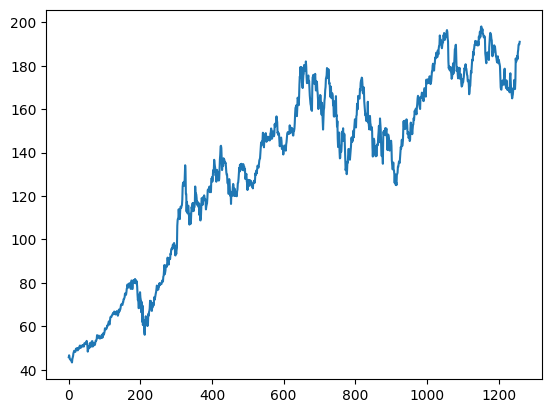

In [ ]:
# plt.plot(df1)
# plt.show()

In [7]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [8]:
training_size = int(len(df1) * 0.65)
test_size = len(df1) - training_size
train_data, test_data = df1[0:training_size, :], df1[training_size:len(df1), :1]

In [9]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [10]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [11]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 317ms/step - loss: 0.0962 - val_loss: 0.0409
Epoch 2/100
12/12 [==============================] - 2s 192ms/step - loss: 0.0138 - val_loss: 0.0020
Epoch 3/100
12/12 [==============================] - 2s 189ms/step - loss: 0.0075 - val_loss: 0.0198
Epoch 4/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0039 - val_loss: 0.0054
Epoch 5/100
12/12 [==============================] - 4s 349ms/step - loss: 0.0024 - val_loss: 0.0020
Epoch 6/100
12/12 [==============================] - 2s 197ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/100
12/12 [==============================] - 4s 333ms/step - loss: 0.0021 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 6s 528ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 9/100
12/12 [==============================] - 3s 202ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 10/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0021 - val_l

In [13]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

11/11 [==============================] - 0s 38ms/step


In [ ]:
# print(f"Train RMSE: {math.sqrt(mean_squared_error(y_train, train_predict))}")
# print(f"Test RMSE: {math.sqrt(mean_squared_error(ytest, test_predict))}")

Train RMSE: 125.54567533763354
Test RMSE: 171.1692862716244


In [14]:
look_back = 100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) + 1:len(df1) - 1, :] = test_predict
# plt.plot(scaler.inverse_transform(df1))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show()

In [15]:
x_input = test_data[len(test_data) - time_step:].reshape(1, -1)
temp_input = list(x_input[0])

In [16]:
lst_output = []
n_steps = time_step
i = 0
while i < 200:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1

In [17]:
predicted_value_after_200_days = scaler.inverse_transform(np.array(lst_output[-1]).reshape(-1, 1))

In [19]:
print(f"{predicted_value_after_200_days[0][0]}")

89.38525761349298
